Importing Libraries 


In [1]:
import os
import sys
#from stocker import Stocker
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import pandas_datareader as pdr
import matplotlib.dates as mdates
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
%config IPCompleter.greedy=True
from matplotlib import style
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas.plotting import register_matplotlib_converters

CSV DATA FOR THE AIRLINES COMPANY (DELTA,QANTAS,AIR CHINA,LUFTHANSA,AMERICAN)

In [20]:
Airchina_df = pd.read_csv('../Resources/Air China.csv')
Lufthansa_df = pd.read_csv('../Resources/Lufthansa.csv')
American_df = pd.read_csv('../Resources/AAL.csv')
Delta_df = pd.read_csv('../Resources/Delta.csv')
Qantas_df = pd.read_csv('../Resources/Qantas.csv')

In [21]:
style.use('classic')

In [22]:
Airchina_df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,6.03,6.10,5.76,5.89,5.382120,8900060
1,2016-01-05,5.89,5.94,5.60,5.77,5.272467,8873802
2,2016-01-06,5.66,5.71,5.53,5.60,5.117126,13535483
3,2016-01-07,5.50,5.60,5.22,5.36,4.897821,22311296
4,2016-01-08,5.57,5.60,5.21,5.22,4.769892,22703473
...,...,...,...,...,...,...,...
1326,2021-05-20,6.38,6.40,6.28,6.34,6.340000,7535795
1327,2021-05-21,6.34,6.38,6.26,6.33,6.330000,6760523
1328,2021-05-24,6.40,6.40,6.27,6.27,6.270000,7416916
1329,2021-05-25,6.30,6.41,6.21,6.36,6.360000,11465632


In [23]:
Lufthansa_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-27,14.185,14.270,13.940,14.165,12.725619,3573841
1,2016-01-28,14.120,14.120,13.310,13.465,12.096751,6921112
2,2016-01-29,13.610,13.735,13.330,13.465,12.096751,4952518
3,2016-02-01,13.535,13.935,13.450,13.875,12.465089,4672690
4,2016-02-02,13.860,13.945,13.725,13.780,12.379741,2728289
...,...,...,...,...,...,...,...
1345,2021-05-19,10.850,10.900,10.624,10.812,10.812000,2439474
1346,2021-05-20,10.900,10.960,10.676,10.868,10.868000,1840423
1347,2021-05-21,10.200,10.316,10.138,10.162,10.162000,16208916
1348,2021-05-25,10.250,10.380,10.172,10.314,10.314000,6100931


In [24]:
American_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-27,40.150002,40.869999,39.480000,39.689999,37.929569,10186000
1,2016-01-28,39.610001,39.790001,37.660000,38.139999,36.448322,17112300
2,2016-01-29,37.520000,39.090000,36.599998,38.990002,37.260632,20957500
3,2016-02-01,39.000000,39.939999,38.630001,39.380001,37.633320,12023500
4,2016-02-02,38.830002,38.970001,37.000000,37.029999,35.387558,12401400
...,...,...,...,...,...,...,...
1338,2021-05-20,23.180000,23.180000,22.290001,22.600000,22.600000,33606500
1339,2021-05-21,22.709999,23.040001,22.510000,22.570000,22.570000,26215900
1340,2021-05-24,22.850000,23.049999,22.350000,22.990000,22.990000,26159300
1341,2021-05-25,23.450001,24.170000,23.110001,23.209999,23.209999,50630500


In [25]:
Delta_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,49.419998,49.419998,48.299999,48.660000,44.223190,12323200
1,2016-01-05,49.310001,49.750000,47.040001,48.570000,44.141399,14557200
2,2016-01-06,47.790001,49.299999,47.630001,48.930000,44.468582,10375900
3,2016-01-07,48.389999,48.680000,46.740002,47.000000,42.714558,11301100
4,2016-01-08,47.480000,48.950001,46.490002,46.610001,42.360115,10850300
...,...,...,...,...,...,...,...
1354,2021-05-20,46.349998,46.369999,44.910000,45.410000,45.410000,12341700
1355,2021-05-21,45.700001,46.000000,45.110001,45.209999,45.209999,9888200
1356,2021-05-24,45.570000,46.279999,45.009998,46.169998,46.169998,8409100
1357,2021-05-25,47.410000,48.160000,46.509998,46.669998,46.669998,14657000


In [26]:
Qantas_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,4.11,4.14,4.050,4.09,3.528738,4635512
1,2016-01-05,4.05,4.09,4.020,4.07,3.511483,5056181
2,2016-01-06,4.09,4.10,3.990,4.03,3.476972,5992225
3,2016-01-07,4.08,4.15,4.055,4.08,3.520110,9610389
4,2016-01-08,4.07,4.12,4.010,4.06,3.502855,10392341
...,...,...,...,...,...,...,...
1362,2021-05-21,4.75,4.78,4.670,4.74,4.740000,10915177
1363,2021-05-24,4.76,4.78,4.680,4.72,4.720000,5590400
1364,2021-05-25,4.71,4.74,4.660,4.71,4.710000,5839636
1365,2021-05-26,4.69,4.70,4.620,4.67,4.670000,8364220


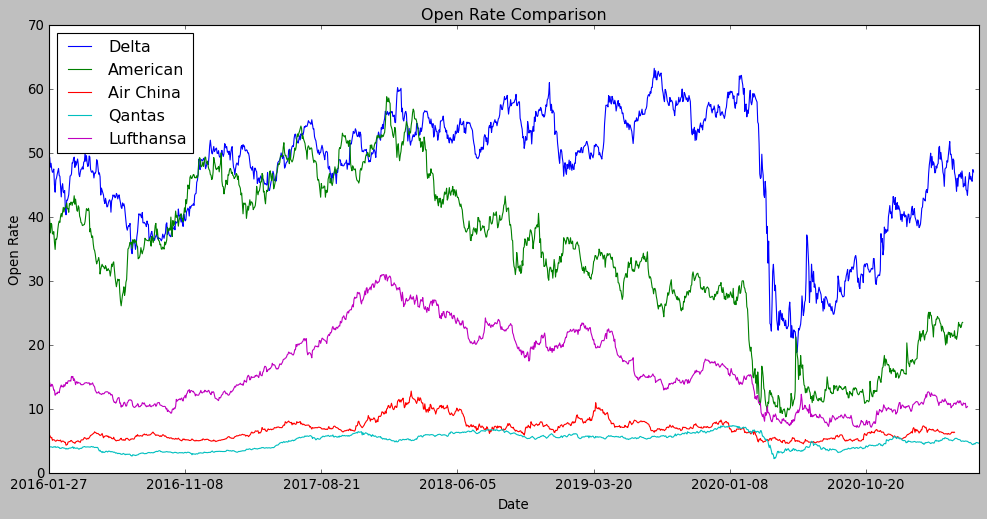

In [27]:
ax = plt.gca()
#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Delta_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),label='Lufthansa',x_compat=True)


plt.title("Open Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Open Rate");

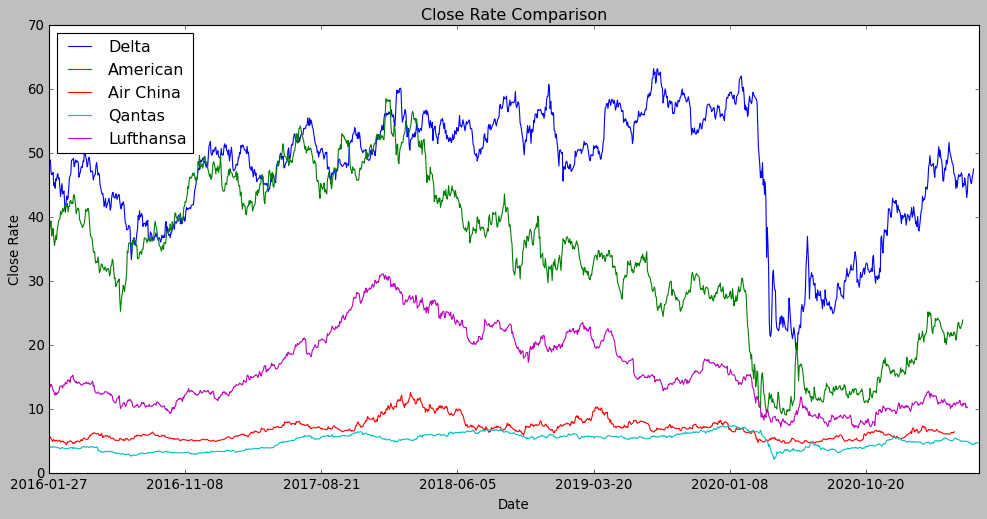

In [28]:
ax = plt.gca()

Delta_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),label='Lufthansa',x_compat=True)


plt.title("Close Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Close Rate");

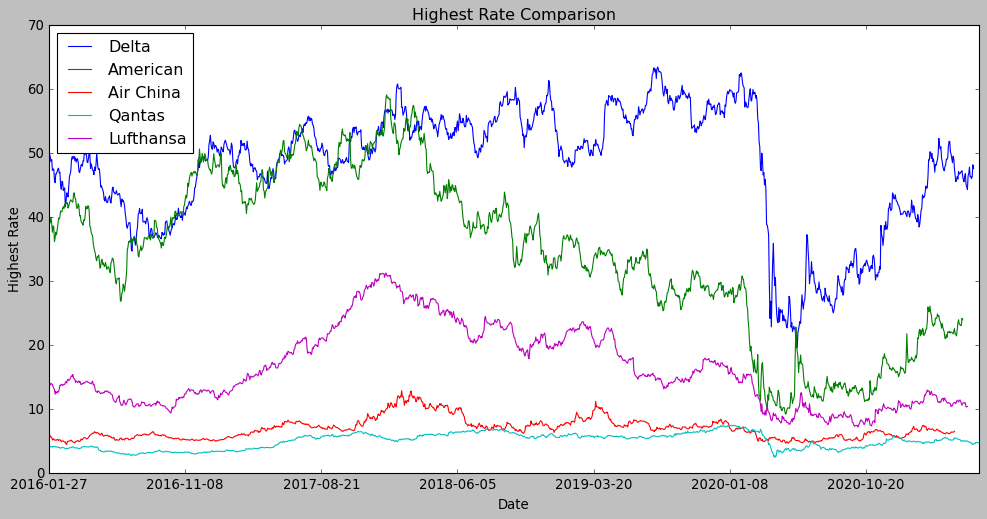

In [29]:
ax = plt.gca()


Delta_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),label='Lufthansa',x_compat=True)


plt.title("Highest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Highest Rate");

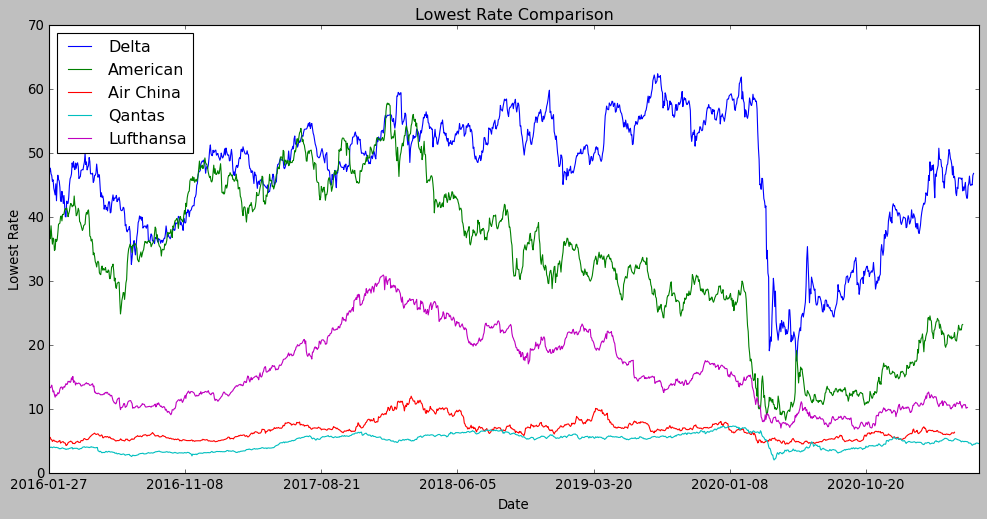

In [30]:
ax = plt.gca()

Delta_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),label='Lufthansa',x_compat=True)


plt.title("Lowest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Lowest Rate");

TIME SERIES ANALYSIS WITH PANDAS DATA READER

In [48]:
#Time series
Airchina_df = pdr.get_data_yahoo('AIRYY',
                        start=datetime.datetime(2019,1,1),
                        end=datetime.datetime(2021,5,3))
American_df = pdr.get_data_yahoo('AAL',
                        start=datetime.datetime(2019,1,1),
                        end=datetime.datetime(2021,5,3))

Qantas_df = pdr.get_data_yahoo('QABSY',
                        start=datetime.datetime(2019,1,1),
                        end=datetime.datetime(2021,5,3))
Lufthansa_df = pdr.get_data_yahoo('DLAKY',
                        start=datetime.datetime(2019,1,1),
                        end=datetime.datetime(2021,5,3))
Delta_df = pdr.get_data_yahoo('DAL',
                        start=datetime.datetime(2019,1,1),
                        end=datetime.datetime(2021,5,3))

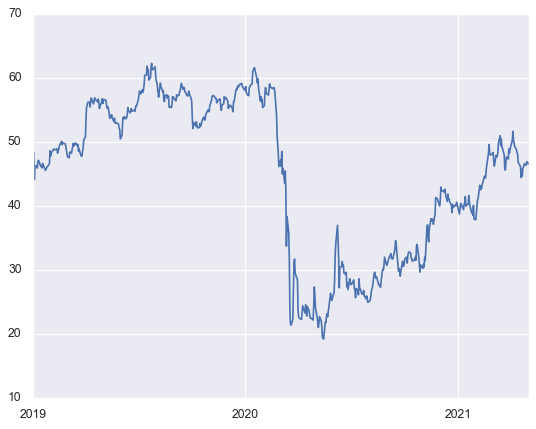

In [49]:
#Delta Time series
plt.plot(Delta_df.index, Delta_df['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()


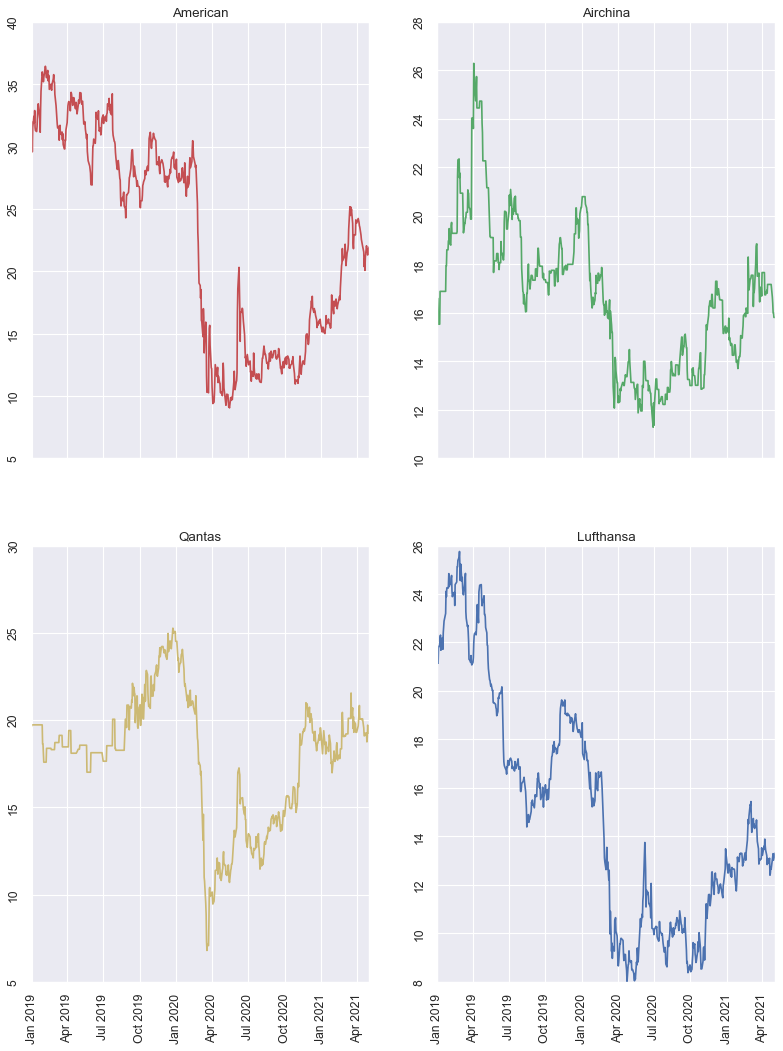

In [50]:
f, ax = plt.subplots(2, 2, figsize=(12,15), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(American_df.index, American_df['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('American');

ax[0,1].plot(Airchina_df.index, Airchina_df['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Airchina');

ax[1,0].plot(Qantas_df.index, Qantas_df['Adj Close'], color='y')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Qantas');

ax[1,1].plot(Lufthansa_df.index, Lufthansa_df['Adj Close'], color='b')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Lufthansa');


Daily Percentage

In [62]:
Daily_close_American_df = American_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_American_df = Daily_close_American_df.pct_change()

# Replace NA values with 0
Daily_pct_change_American_df.fillna(0, inplace=True)

Daily_pct_change_American_df.head()

,Adj Close
Date,
2018-12-31,0.000000
2019-01-02,0.011523
2019-01-03,-0.074507
2019-01-04,0.065868
2019-01-07,0.028402


In [63]:
Daily_close_Airchina_df = Airchina_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Airchina_df = Daily_close_Airchina_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Airchina_df.fillna(0, inplace=True)

Daily_pct_change_Airchina_df.head()

,Adj Close
Date,
2018-12-31,0.000000
2019-01-02,0.000000
2019-01-03,-0.025822
2019-01-04,-0.039157
2019-01-07,0.000000


In [64]:
Daily_close_Delta_df = Delta_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Delta_df = Daily_close_Delta_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Delta_df.fillna(0, inplace=True)

Daily_pct_change_Delta_df.head()

,Adj Close
Date,
2018-12-31,0.000000
2019-01-02,0.003807
2019-01-03,-0.089439
2019-01-04,0.047797
2019-01-07,0.001255


In [65]:
Daily_close_Lufthansa_df = Lufthansa_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Lufthansa_df = Daily_close_Delta_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Lufthansa_df.fillna(0, inplace=True)

Daily_pct_change_Lufthansa_df.head()

,Adj Close
Date,
2018-12-31,0.000000
2019-01-02,0.003807
2019-01-03,-0.089439
2019-01-04,0.047797
2019-01-07,0.001255


In [66]:
Daily_close_Qantas_df = Qantas_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Qantas_df = Daily_close_Qantas_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Qantas_df.fillna(0, inplace=True)

Daily_pct_change_Qantas_df.head()

,Adj Close
Date,
2018-12-31,0.00000
2019-01-02,0.00667
2019-01-03,0.00000
2019-01-04,0.00000
2019-01-07,0.00000


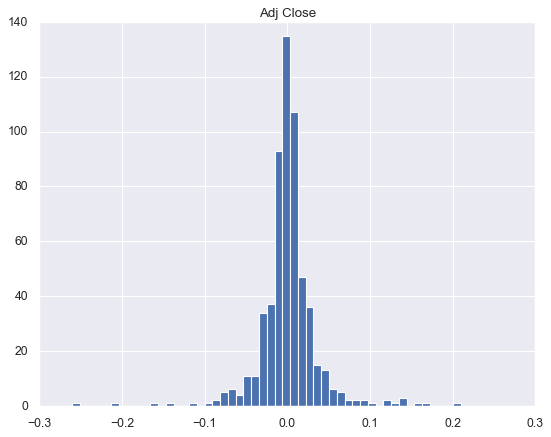

In [67]:

Daily_pct_change_Delta_df.hist(bins=50)

# Show the plot
plt.show()

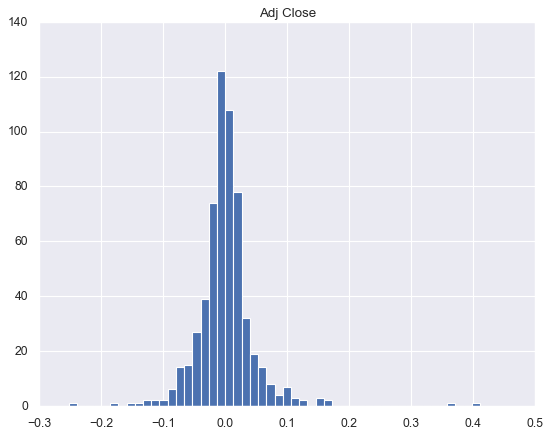

In [68]:

Daily_pct_change_American_df.hist(bins=50)

# Show the plot
plt.show()

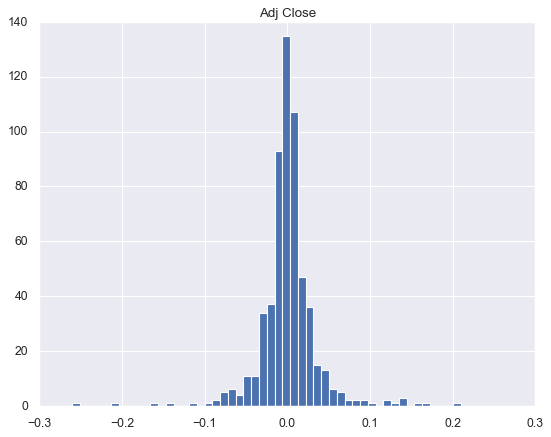

In [69]:

Daily_pct_change_Lufthansa_df.hist(bins=50)

# Show the plot
plt.show()

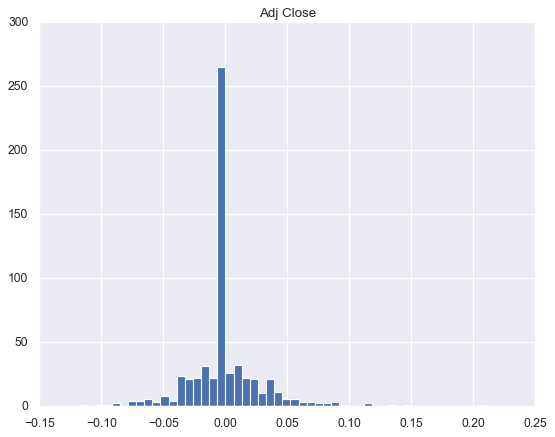

In [70]:

Daily_pct_change_Airchina_df.hist(bins=50)

# Show the plot
plt.show()

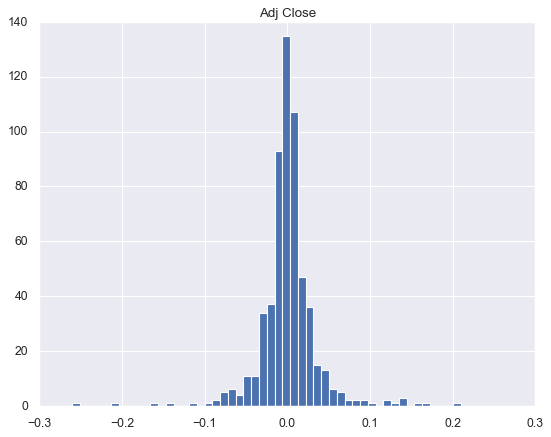

In [71]:

Daily_pct_change_Delta_df.hist(bins=50)

# Show the plot
plt.show()

Using seabon to check the confidnce interval of Each company

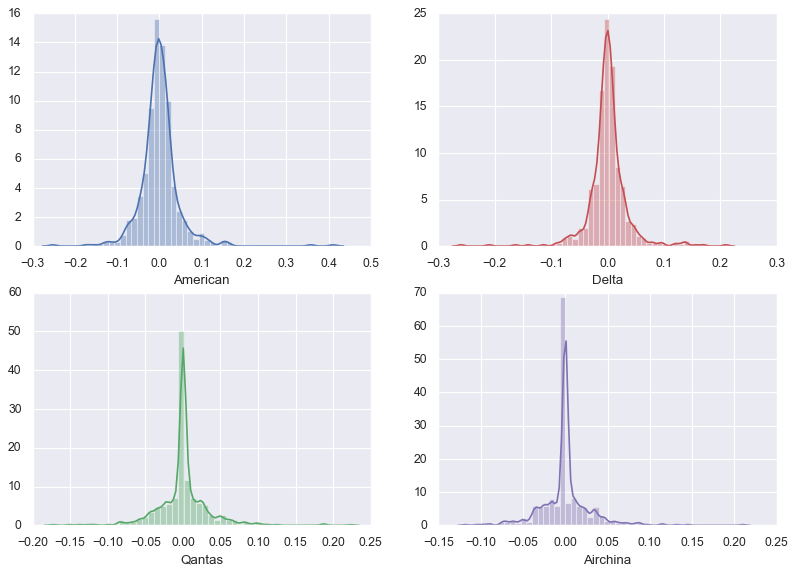

In [72]:
#  matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot a simple histogram with binsize determined automatically
sns.distplot(Daily_pct_change_American_df['Adj Close'], color="b", ax=axes[0, 0], axlabel='American');

sns.distplot(Daily_pct_change_Delta_df['Adj Close'], color="r", ax=axes[0, 1], axlabel='Delta');

sns.distplot(Daily_pct_change_Qantas_df['Adj Close'], color="g", ax=axes[1, 0], axlabel='Qantas');

# Ploting a historgram and kernel density estimate
sns.distplot(Daily_pct_change_Airchina_df['Adj Close'], color="m", ax=axes[1, 1], axlabel='Airchina');
sns.set();

Rolling Mean Analysis

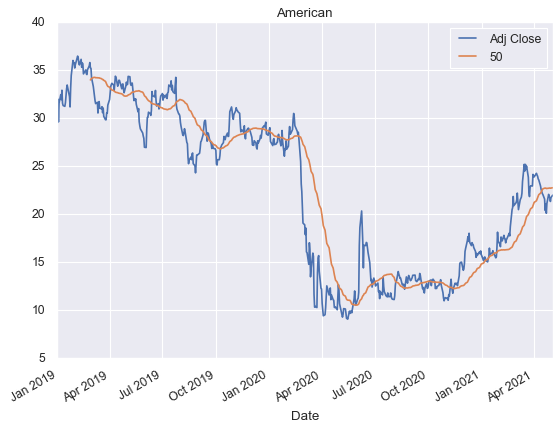

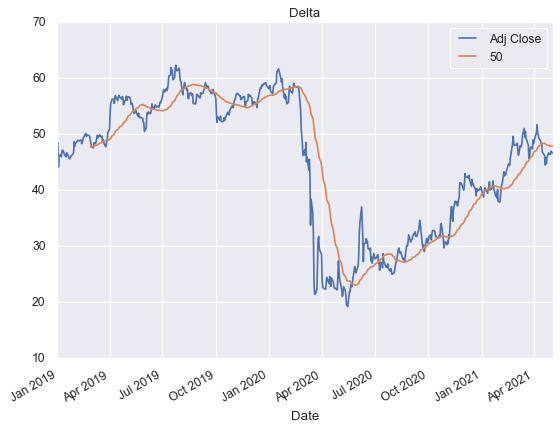

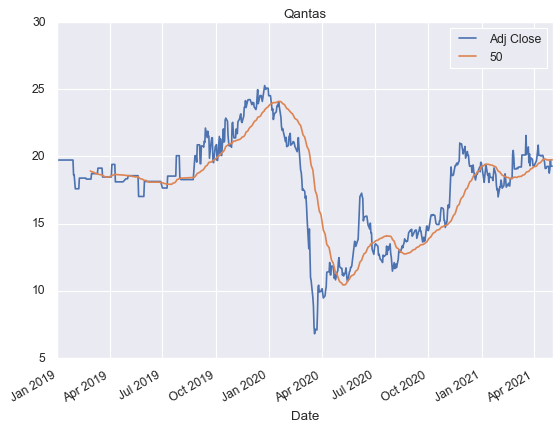

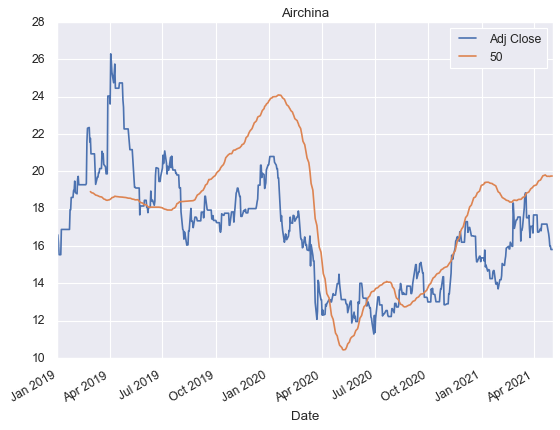

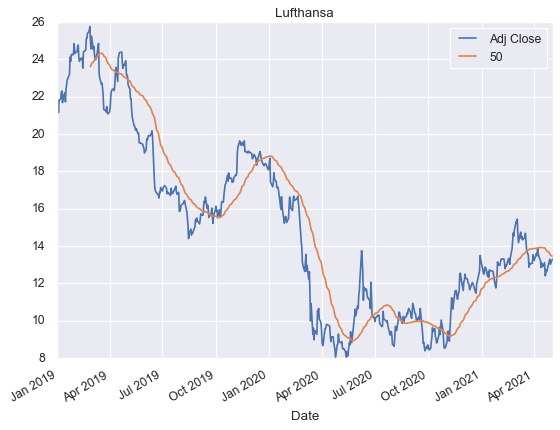

In [73]:
American_df_adj_close_px = American_df['Adj Close']
# Short moving window rolling mean
American_df['50'] = American_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
American_df[['Adj Close', '50']].plot(title="American")

# Show plot
plt.show()

Delta_df_adj_close_px = Delta_df['Adj Close']
# Short moving window rolling mean
Delta_df['50'] = Delta_df_adj_close_px.rolling(window=40).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
Delta_df[['Adj Close', '50']].plot(title="Delta")

# Show plot
plt.show()

Qantas_df_adj_close_px = Qantas_df['Adj Close']
# Short moving window rolling mean
Qantas_df['50'] = Qantas_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Qantas_df[['Adj Close', '50']].plot(title="Qantas")

# Show plot
plt.show()

Airchina_df_adj_close_px = Qantas_df['Adj Close']
# Short moving window rolling mean
Airchina_df['50'] = Airchina_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Airchina_df[['Adj Close', '50']].plot(title="Airchina")


Lufthansa_df_adj_close_px = Lufthansa_df['Adj Close']
# Short moving window rolling mean
Lufthansa_df['50'] = Lufthansa_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Lufthansa_df[['Adj Close', '50']].plot(title="Lufthansa")

# Show plot
plt.show()

